In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/natgeo_2019-11-21.csv')

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['created_time'])
df['y'] = data['likes']

In [4]:
df.head()

,ds,y
0,2019-11-21 22:34:42,59851
1,2019-11-21 19:36:10,90091
2,2019-11-21 16:37:28,79640
3,2019-11-21 13:38:17,280948
4,2019-11-21 01:34:31,604079


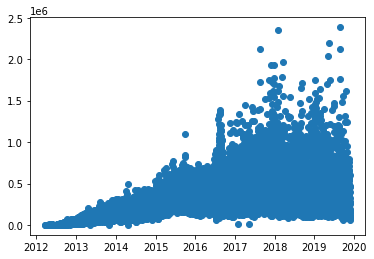

In [5]:
plt.scatter(x=df.ds, y=df.y)

In [6]:
#dataframe of promotional marketing events 

promo = pd.DataFrame({'holiday': "Promo event",
                      'ds' : pd.to_datetime(['2016-08-01']),
                      'lower_window': 0,
                      'upper_window': 31})
future_promo = pd.DataFrame({'holiday': "Promo event",
                      'ds' : pd.to_datetime(['2020-08-01']),
                      'lower_window': 0,
                      'upper_window': 31})

promos = pd.concat([promo])
promos_hypothetical = pd.concat([promo, future_promo])

In [7]:
promos

,holiday,ds,lower_window,upper_window
0,Promo event,2016-08-01,0,31


In [8]:
promos_hypothetical

,holiday,ds,lower_window,upper_window
0,Promo event,2016-08-01,0,31
0,Promo event,2020-08-01,0,31


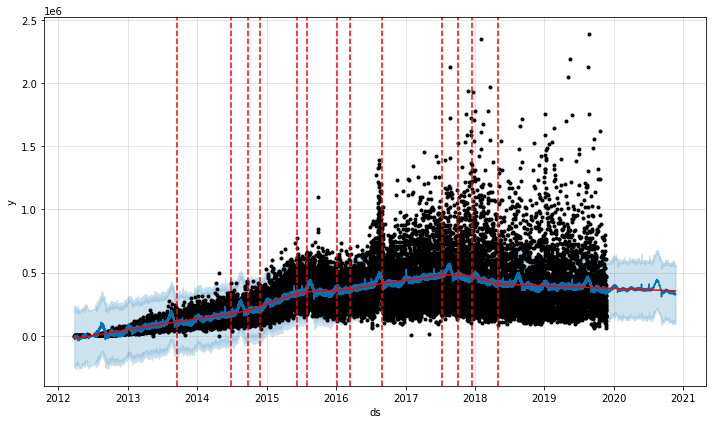

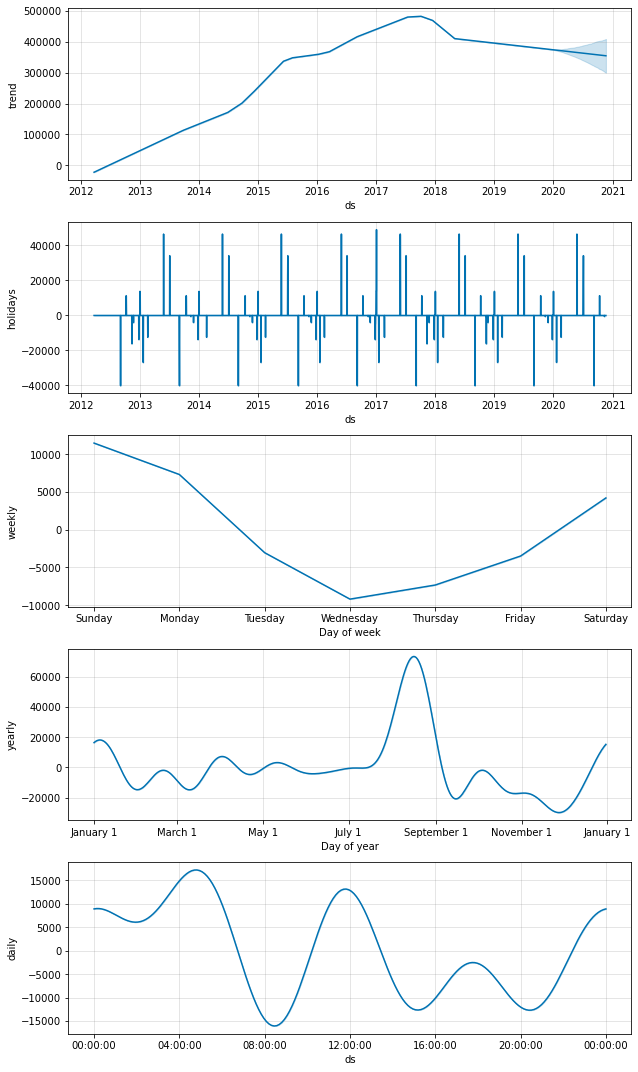

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-06-15 22:34:42 and 2018-11-21 22:34:42


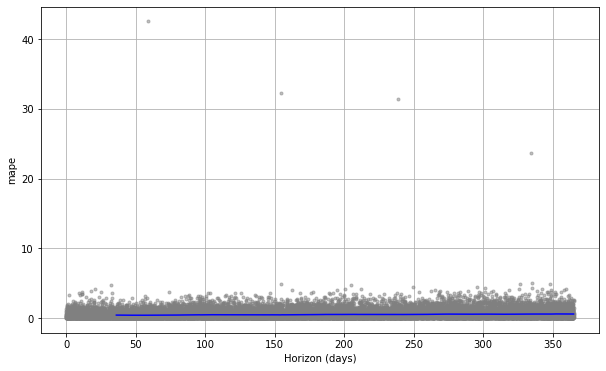

mape: 49.05%


In [9]:
prophet = Prophet()
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

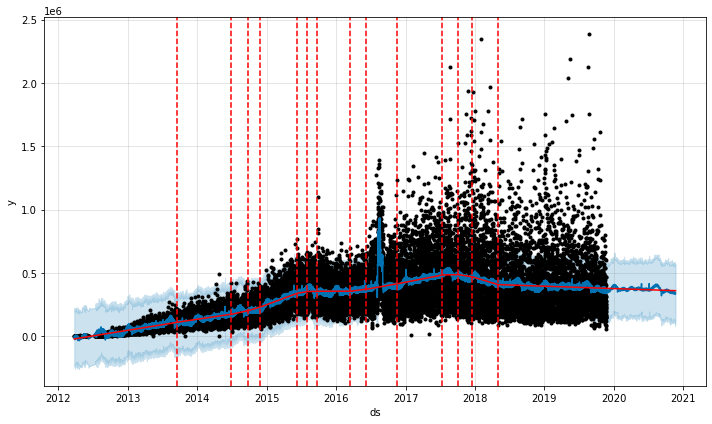

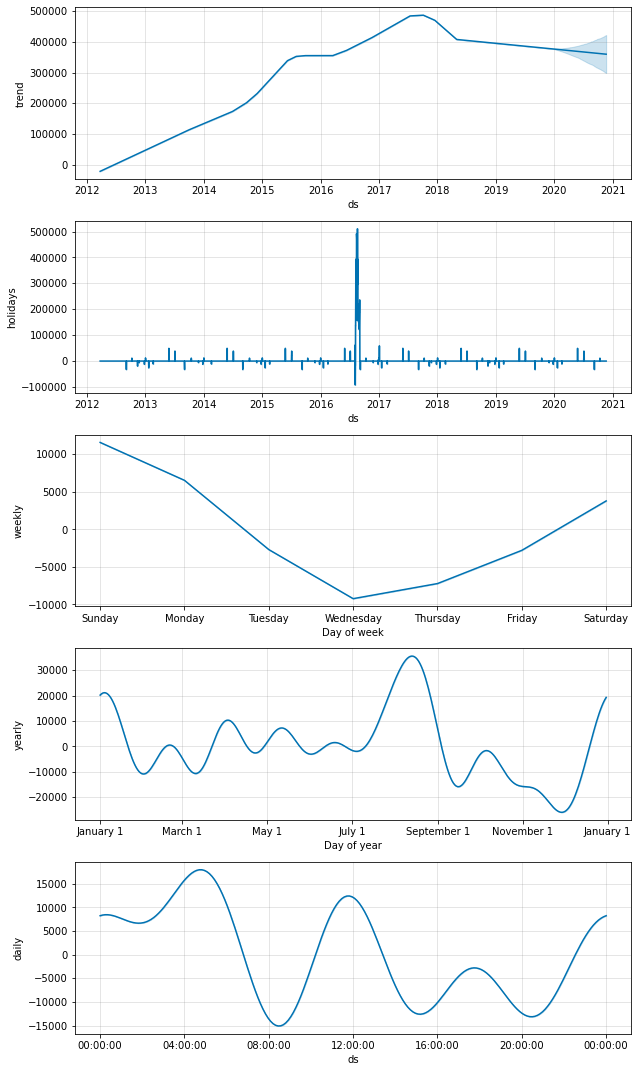

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-06-15 22:34:42 and 2018-11-21 22:34:42


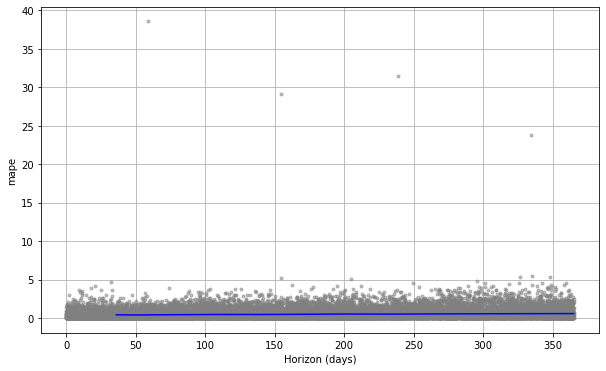

mape: 49.15%


In [10]:
prophet = Prophet(holidays=promos)
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

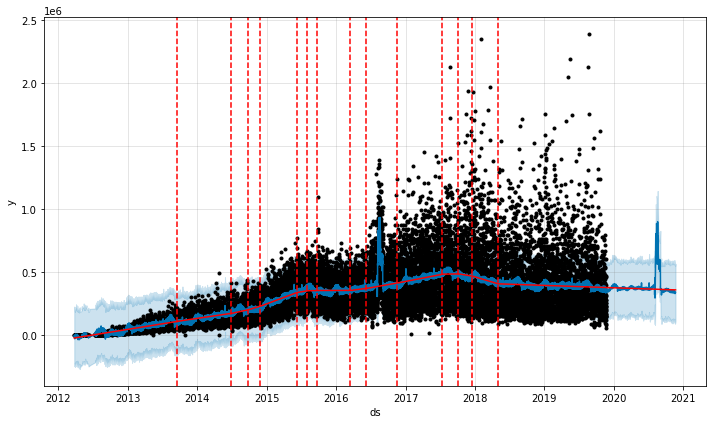

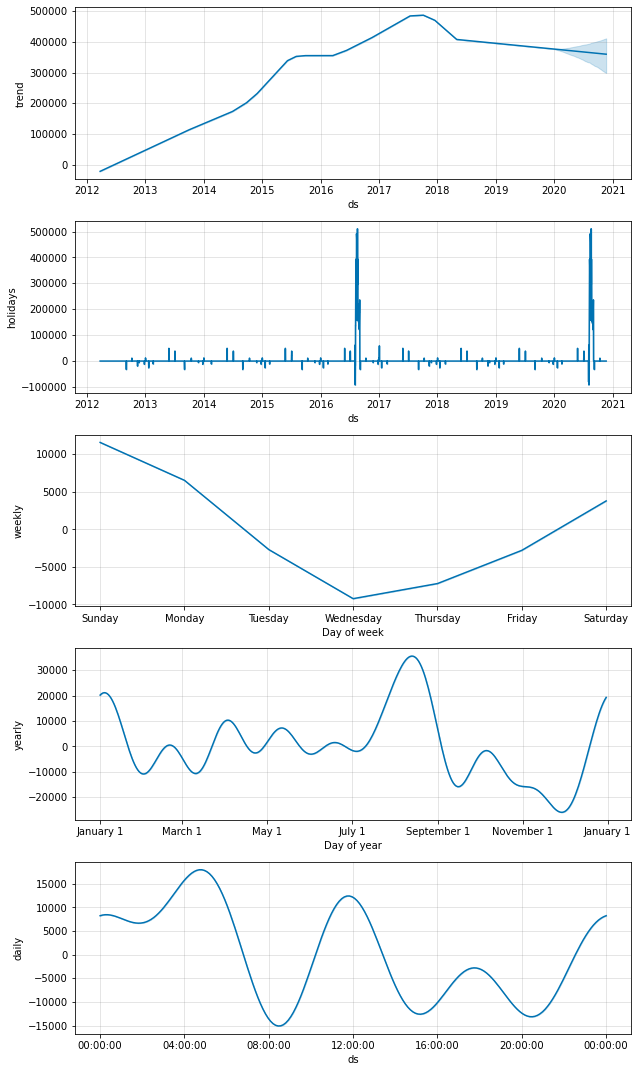

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-06-15 22:34:42 and 2018-11-21 22:34:42


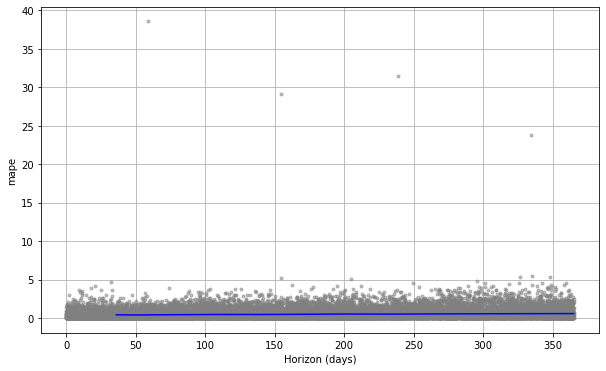

mape: 49.15%


In [11]:
prophet = Prophet(holidays=promos_hypothetical)
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

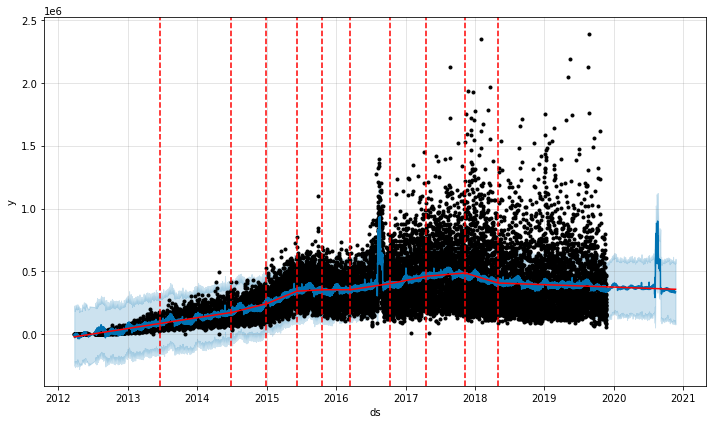

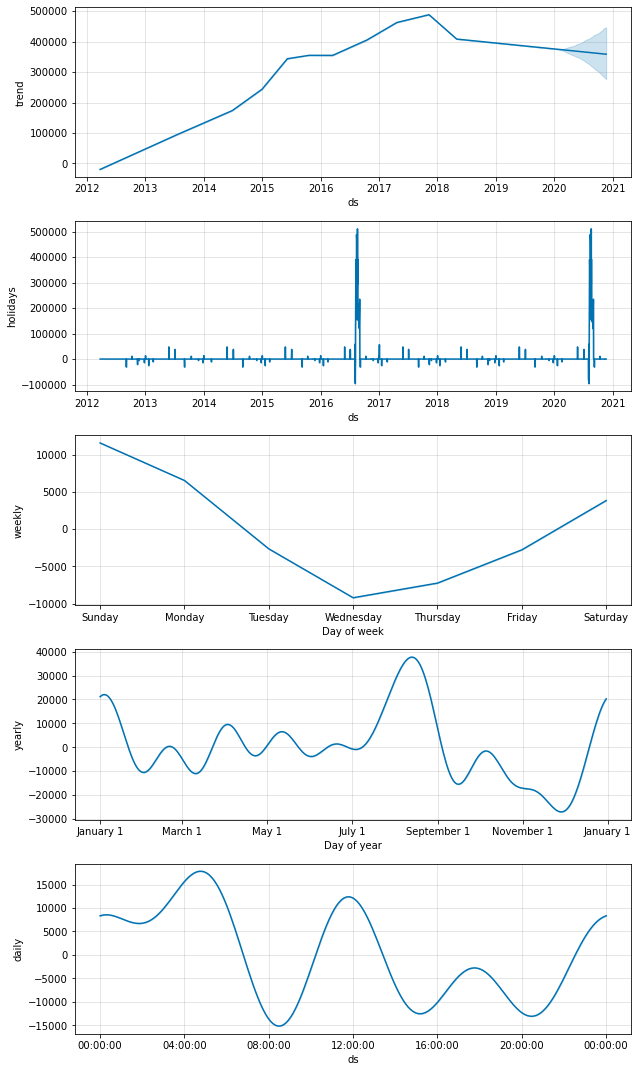

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-06-15 22:34:42 and 2018-11-21 22:34:42


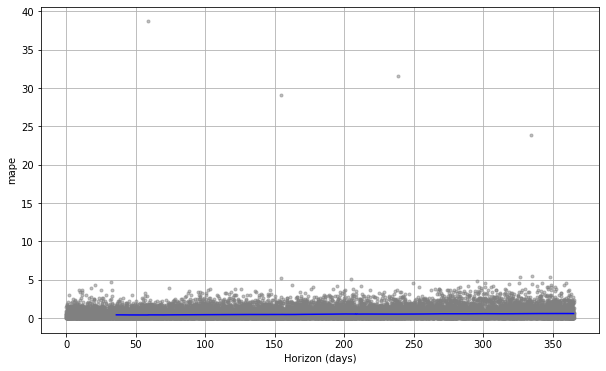

mape: 49.38%


In [12]:
prophet = Prophet(holidays=promos_hypothetical, n_changepoints=10)
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

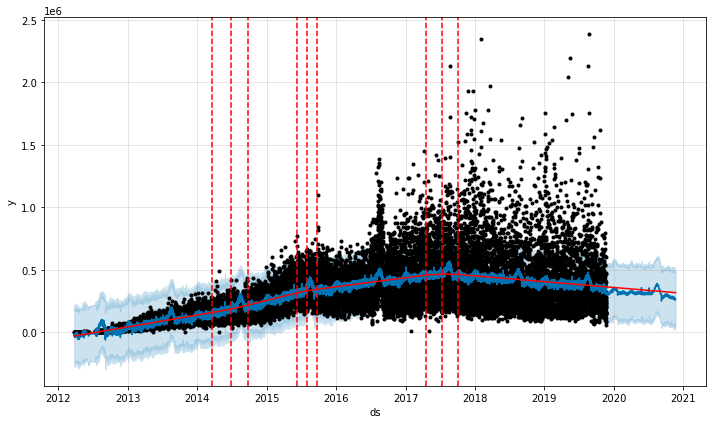

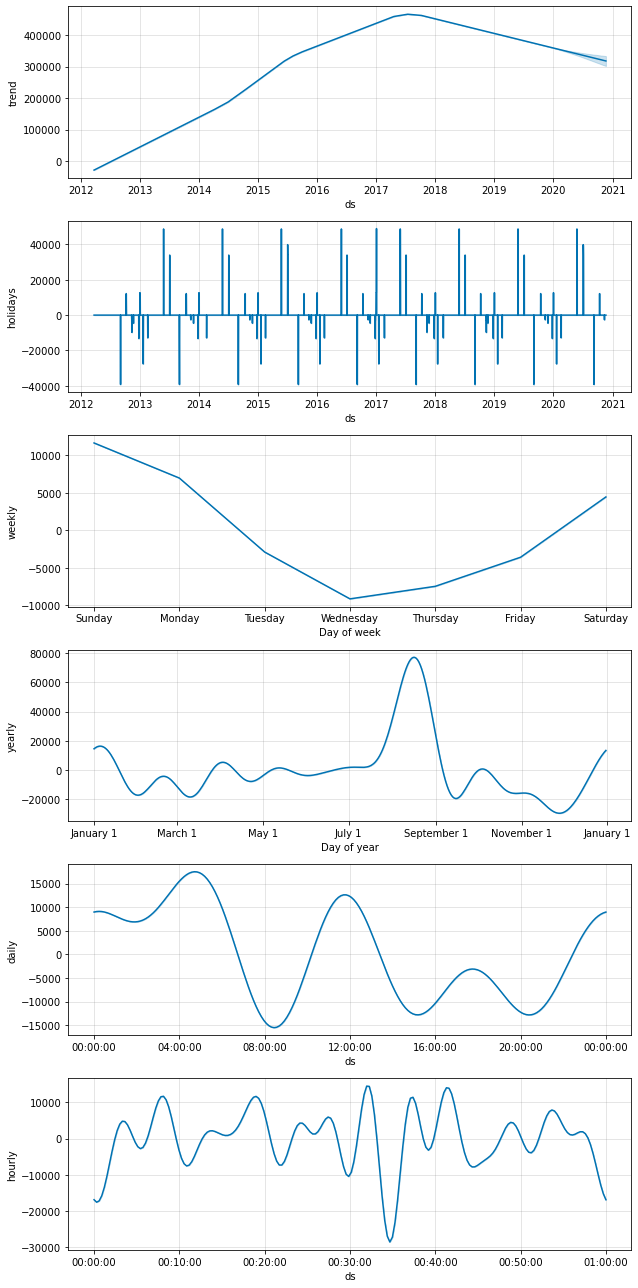

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-06-15 22:34:42 and 2018-11-21 22:34:42


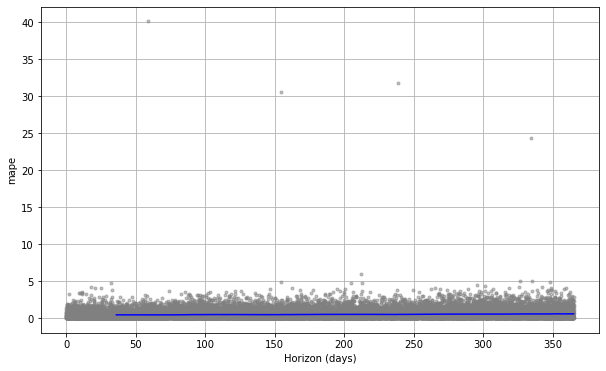

mape: 48.38%


In [13]:
prophet = Prophet(growth='linear',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
#                   holidays=holidays,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0
                 ).add_seasonality(name='hourly',
                                    period=1/24,
                                    fourier_order=15,
                                    prior_scale=10,
                                    mode='additive'
                  )
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

In [14]:
df.head()

,ds,y
0,2019-11-21 22:34:42,59851
1,2019-11-21 19:36:10,90091
2,2019-11-21 16:37:28,79640
3,2019-11-21 13:38:17,280948
4,2019-11-21 01:34:31,604079


In [15]:
daily = df.groupby(pd.Grouper(key='ds', freq='D')).mean().reset_index()
daily.head()

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000


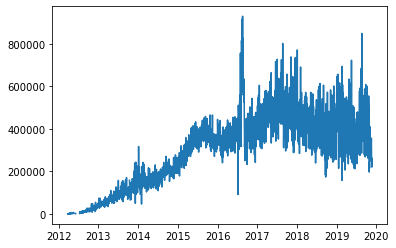

In [16]:
plt.plot(daily['ds'], daily['y'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


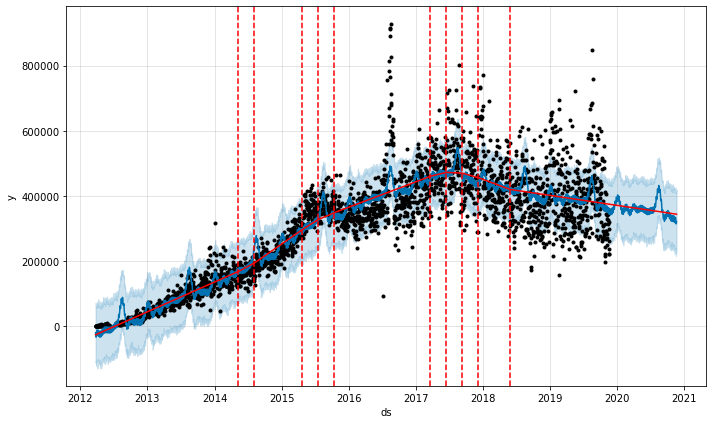

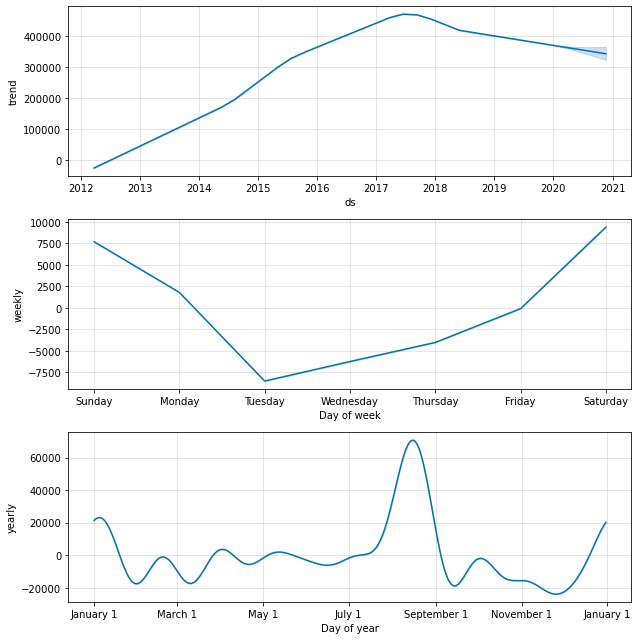

In [17]:
prophet = Prophet()
prophet.fit(daily)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


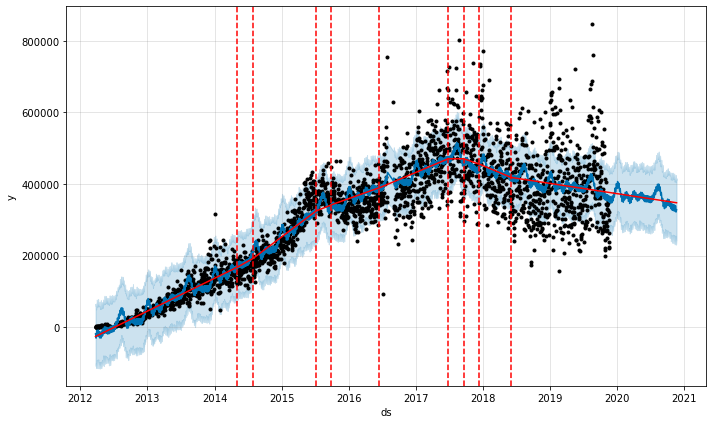

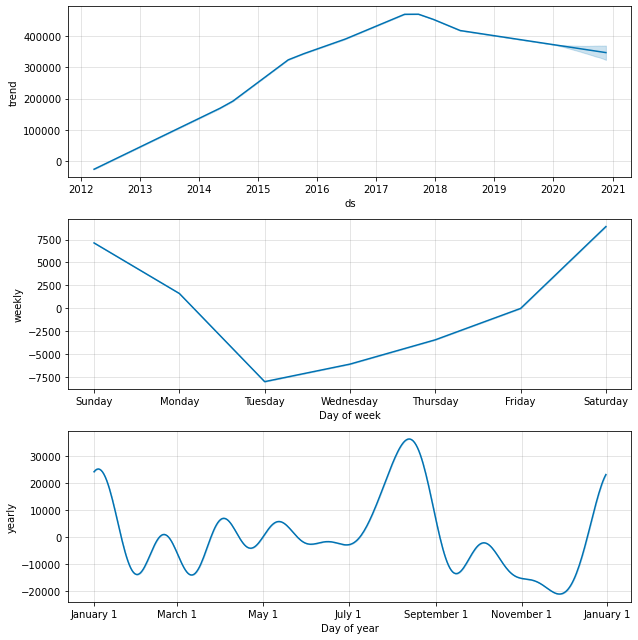

In [18]:
prophet = Prophet()
prophet.fit(daily[(daily['ds'] < pd.to_datetime('2016-08-01')) | (daily['ds'] > pd.to_datetime('2016-08-31'))])
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()